<a href="https://colab.research.google.com/github/hollywestfall/nnml/blob/master/westfall_nn_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Categorization task
## y = FAST
## x = FR performance

In [0]:
# import packages
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# upload data from csv
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['data_std.csv']))

Saving data_std.csv to data_std.csv


In [0]:
# split data into training and test sets:

# select percentage of data that should be test/train
testnum = math.ceil(.2*len(df)) # change percentage of test data (default is 20%)
trainnum = len(df)-testnum

# randomly sample training set
train_set = df.sample(n=trainnum, random_state=0)
# test set is everything that is not training set
test_set = df.drop(train_set.index)

In [0]:
# set up train and test data

# training data
# separate data from labels
train_set_y = train_set.loc[:, 'fastScore']
# data
train_set_x = train_set.drop(columns='fastScore').values
# zip labels and data back together
train_set_z = list(zip(train_set_x, train_set_y))

# testing data
# separate data from labels
test_set_y = test_set.loc[:, 'fastScore']
# data
test_set_x = test_set.drop(columns='fastScore').values
# zip labels and data back together
test_set_z = list(zip(test_set_x, test_set_y))

In [0]:
# create dataloaders for train and test data
train_loader = torch.utils.data.DataLoader(train_set_z, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set_z, batch_size=100, shuffle=False)

In [0]:
# create nn
net = torch.nn.Sequential(torch.nn.Linear(40, 100), torch.nn.ReLU(), 
                          torch.nn.Linear(100, 40), torch.nn.ReLU(),
                          torch.nn.Linear(40, 6))

In [0]:
# create loss function
xent_loss = torch.nn.CrossEntropyLoss()

# create optimizer
opt = torch.optim.Adam(net.parameters(), lr=1e-3)

In [0]:
# define train function
def train_step(x, t, net, opt_fn, loss_fn):
    x=x.float()
    y = net(x)
    loss = loss_fn(y, t)
    loss.backward()
    opt_fn.step()
    opt_fn.zero_grad()
    return loss

In [0]:
# train and test the model:

# create lists to store train and test accuracy
train_acc = []
test_acc = []

# train for 200 epochs
for epoch in range(200):
    acc_batch = []
    # net.train() #training mode
    for x,t in iter(train_loader): 
        x=x.float()
        loss_train = train_step(x, t, net, opt, xent_loss)
        y = net(x)
        acc_batch.append(torch.mean((t == y.argmax(1)).float()))
    train_acc.append(torch.mean(torch.FloatTensor(acc_batch))) # store train accuracy
    # print(loss_train)

    # net.eval() #evaluation mode
    for x,t in iter(test_loader):
        x=x.float()
        y = net(x)
        acc_batch.append(torch.mean((t == y.argmax(1)).float()))
    test_acc.append(torch.mean(torch.FloatTensor(acc_batch))) # store test accuracy
    # print(torch.mean(torch.FloatTensor(acc_batch)))

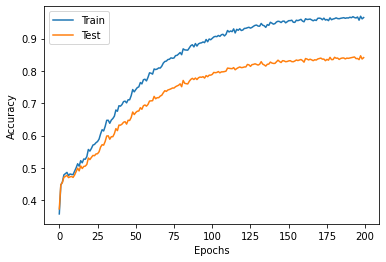

In [12]:
# make a plot
xaxis = np.arange(200)
fig = plt.figure()
ax = plt.subplot(111)
# plt.title("My Second Neural Network", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
ax.plot(xaxis, train_acc, label="Train")
ax.plot(xaxis, test_acc, label="Test")
ax.legend()
# plt.show()
plt.savefig('second_nn.png', dpi=300)
files.download('second_nn.png') 

In [13]:
train_acc[199]

tensor(0.9650)

In [14]:
test_acc[199]

tensor(0.8411)